In [1]:
## This is a notebook to find the parameter values for which there are positive eigenvalues
#for the Schrödinger equation that emerges in the "secondary" eval problem 
#  in the combustion problem

#\rho''(y)+\gamma(y)\rho'(y)=\mu\rho(y)

#where \gamma(y)=(\alpha*beta/2)*sech^2(beta*y)-(\alpha^2)/4*tanh^2(beta*y) for some alpha,beta in [0,1]

#I'm looking at the compactified one parameter system and trying to find alpha (and beta, but we've fixed beta) values 
#for which the accumulated angle is a function of pi, indicating the presence of at least one positive eigenvalue



#october 24 2024

In [2]:
from scipy.integrate import solve_ivp
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from operator import add

In [3]:
#potential function
def gamma(sigma,alpha,beta): return ((alpha*beta)/2)*(1-sigma**2)-((alpha**2)/4)*sigma**2


# the ODE function: mu is the eigenvalue
def ODE_theta(x,y):
    sigma, theta = y ; 
    return [beta*(1-sigma**2),(mu-gamma(sigma,alpha,beta))*(np.cos(theta)**2)-(np.sin(theta))**2]

In [4]:
mu=0; #set eval=0

In [5]:
#domain, initial conditions
t0=-100; #initial time
tf=100; #final time

pert=10**(-4) #perturbation for IC

In [6]:
def jac(Y, alpha,beta, mu):
    sigma=Y[0]
    theta=Y[1]
    f1=-2*beta*sigma, 0
    f2=((np.cos(theta))**2)*((sigma*alpha**2)/2 +sigma*alpha*beta), (-2*np.cos(theta)*np.sin(theta))*(mu+1-((alpha*beta)/2)*(1-sigma**2)-((alpha**2)/4)*sigma**2)
    DF = sm.Matrix([f1,f2])
    return DF


beta= 1


/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_16532/3062282611.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[0]=fp[0]+evec_pert[0][0];
/var/folders/54/8hk9bxx12cl7dq1p1l1m9dz80015w9/T/ipykernel_16532/3062282611.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp_pert[1]=fp[1]+evec_pert[0][1];


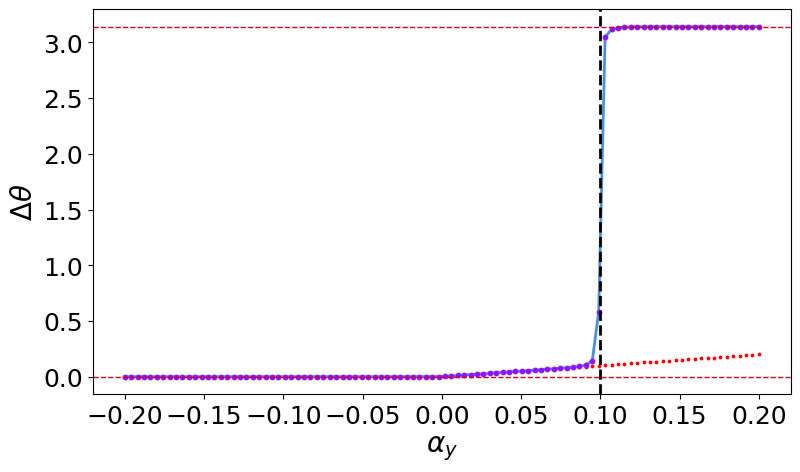

done!


In [7]:
#calculate the accumulated angle by looking across a range of alpha values--using my fixed point values

alpha_range=np.linspace(-.2,.2,100); 
beta_range=[1]; 

for beta in beta_range:
    print("beta= "+str(beta))
    with np.errstate(over='ignore'):
        theta_0_list=[]
        theta_f_list=[]
        range_theta_list=[]
        range_sigma_list=[]
        asym_list=[]
        asym_list_2=[]
        alpha_range_list=[]

       
        fig, ax = plt.subplots(figsize=(9,5))
        ax.set_xlabel(r"$\alpha_y$", fontsize=20)
        ax.set_ylabel(r"$\Delta\theta$",fontsize=20)
        ax.tick_params(axis="both", which="major", labelsize=18)       
    
        for alpha in alpha_range:
            #print("beta="+str(beta))
            if (alpha>=0 and beta>=0):
                theta_0=np.arctan(alpha/2)
                sigma_0=-1 

            elif (alpha<0 and beta>=0):
                theta_0=-np.arctan(alpha/2) 
                sigma_0=-1 
        
            fp=[sigma_0,theta_0]
        
            matrix=jac(fp,alpha,beta,mu)
            einfo=matrix.eigenvects()
            evalue=einfo[0][0];
            evec=einfo[0][2];
            evec_pert=pert*np.asarray(evec);
            fp_pert=np.zeros(2);
            fp_pert[0]=fp[0]+evec_pert[0][0];
            fp_pert[1]=fp[1]+evec_pert[0][1];
            theta_0_list.append(theta_0)
         
        
            sol=solve_ivp(ODE_theta,[t0,tf],fp_pert,dense_output=True, method="RK45", rtol=10**(-13))
    
    
            t = np.linspace(t0,tf,10*tf)
            sigma=sol.sol(t)[0]
            theta=sol.sol(t)[1]
            range_theta=abs(theta[-1]-theta[0])
            range_sigma=abs(sigma[0]-sigma[-1])
            if range_theta<10:
                
                range_theta_list.append(range_theta)
                alpha_range_list.append(alpha)
             
           
            
            eval_cond=2*np.arctan(alpha/2)
        
            
            if alpha>0:
                plt.scatter(alpha,eval_cond, color="red",s=3)
                
            #elif alpha<=0:
                #plt.scatter(alpha,eval_cond+np.pi, color="red",s=3, zorder=2)
             #   plt.scatter(alpha,-eval_cond, color="red",s=3, zorder=2)
                #plt.scatter(alpha,eval_cond+np.pi, color="red",s=3, zorder=2)
           # plt.scatter(alpha,-2*np.arctan(alpha/2), color="red",s=3)
            #plt.scatter(alpha,2*np.arctan(alpha/2)+np.pi, color="red",s=5)
    
                
                
      
    
        plt.plot(alpha_range_list, range_theta_list, linewidth=2,color="#4A90E2",zorder=1)
        
        plt.scatter(alpha_range_list, range_theta_list, s=10, color="#9013FE")
        plt.axvline(x=0.09991679144388553, color="black",linestyle="dashed",linewidth=2)
      
        for i in range(2):
            plt.axhline(y=i*np.pi, color="#D0021B", linestyle="dashed",linewidth=1)
                    
        
        #plt.legend()    
        #print("eval condition=", eval_cond)
        #print('delta theta=' + str(delta_theta))
        #print('delta sigma=' + str(delta_sigma))    

        plt.savefig("transverse_accangle_beta1_zoomedin.pdf",format='pdf',bbox_inches='tight')
        plt.show()
print("done!")       